In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
plt.style.use('ggplot')

In [11]:
from import_data import import_diabetes
df = import_diabetes()
df

Diagnosed Diabetes Percentage  \
State   County                                      
alabama autauga                               9.5   
        baldwin                               8.4   
        barbour                              13.5   
        bibb                                 10.2   
        blount                               10.5   
...                                           ...   
wyoming sweetwater                            7.8   
        teton                                 3.8   
        uinta                                 8.4   
        washakie                              7.4   
        weston                                7.6   

                    Newly Diagnosed Diabetes Rate per 1000  \
State   County                                               
alabama autauga                                        6.6   
        baldwin                                        5.5   
        barbour                                       10.1   
        bibb                                           7.6   
        blount                                         7.5   
...                                                    ...   
wyoming sweetwater                                     5.2   
        teton                                          2.5   
        uinta                                          5.9   
        washakie                                       5.2   
        weston                                         5.2   

                    Obesity Percentage  Physical Inactivity Percentage  \
State   County                                                           
alabama autauga                   29.6                            23.8   
        baldwin                   28.3                            22.0   
        barbour                   29.3                            23.2   
        bibb                      23.1                            23.0   
        blount                    27.8                            24.7   
...                                ...                             ...   
wyoming sweetwater                31.0                            23.2   
        teton                     10.5                            10.7   
        uinta                     33.2                            23.1   
        washakie                  25.4                            20.2   
        weston                    32.0                            21.8   

                    SUMLEV  STATE  COUNTY  YEAR  AGEGRP  TOT_POP  ...  \
State   County                                                    ...   
alabama autauga         50      1       1    11       0    55533  ...   
        baldwin         50      1       3    11       0   217855  ...   
        barbour         50      1       5    11       0    24872  ...   
        bibb            50      1       7    11       0    22367  ...   
        blount          50      1       9    11       0    57771  ...   
...                    ...    ...     ...   ...     ...      ...  ...   
wyoming sweetwater      50     56      37    11       0    42858  ...   
        teton           50     56      39    11       0    23269  ...   
        uinta           50     56      41    11       0    20292  ...   
        washakie        50     56      43    11       0     7877  ...   
        weston          50     56      45    11       0     6924  ...   

                    F_CROWD  F_NOVEH  F_GROUPQ  F_THEME4  F_TOTAL  E_UNINSUR  \
State   County                                                                 
alabama autauga           0        0         0         0        0       3875   
        baldwin           0        0         0         1        1      20864   
        barbour           0        0         1         2        8       2558   
        bibb              0        0         1         2        2       1619   
        blount            0        0         0         0        0       6303   
...                     ...      ...       ...    

In [28]:
df['PCT_MALE'] = round(df['TOT_MALE']/df['TOT_POP']*100,2)
df['PCT_FEMALE'] = round(df['TOT_FEMALE']/df['TOT_POP']*100,2)

south = ['Alabama', 'Arkansas', 'Florida', 
            'Georgia', 'Kentucky', 'Louisiana', 
            'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina',
            'Tennessee', 'Texas', 'Virginia' ,'West Virginia']

northeast = ['connecticut','maine','massachusetts',
      'new hampshire','new jersey','new york',
      'maryland','delaware',
      'pennsylvania','rhode island','vermont','district of columbia']

midwest = ['michigan','ohio','wisconsin','minnesota','illinois','indiana',
      'iowa','missouri','north dakota','south dakota','nebraska','kansas']

west = ['arizona','colorado','utah','nevada','new mexico','idaho','montana','wyoming',
     'california','washington','oregon','hawaii','alaska']
south = list(map(lambda x: x.lower(),south))

for region,string in zip([south, northeast,midwest,west],['south', 'northeast','midwest','west']):
    df[f'in_{string}'] = 0
    df.loc[region,f'in_{string}'] = 1
    
    
keep_columns_lst = (['Diagnosed Diabetes Percentage',
                     'Newly Diagnosed Diabetes Rate per 1000',
                     'Obesity Percentage','Physical Inactivity Percentage',
                     'TOT_POP','PCT_MALE','PCT_FEMALE',
                     'EP_POV','EP_UNEMP','EP_UNINSUR','E_PCI',
                     'EP_NOHSDP','EP_AGE65','EP_AGE17',
                     'EP_SNGPNT','EP_MINRTY','EP_MOBILE',
                     'EP_NOVEH','NHWA_PCT','NHBA_PCT','NHAA_PCT','H_PCT',
                     'in_south','in_northeast','in_midwest','in_west'
                     ])

fdf = df[keep_columns_lst].copy()

In [29]:
fdf

Diagnosed Diabetes Percentage  \
State   County                                      
alabama autauga                               9.5   
        baldwin                               8.4   
        barbour                              13.5   
        bibb                                 10.2   
        blount                               10.5   
...                                           ...   
wyoming sweetwater                            7.8   
        teton                                 3.8   
        uinta                                 8.4   
        washakie                              7.4   
        weston                                7.6   

                    Newly Diagnosed Diabetes Rate per 1000  \
State   County                                               
alabama autauga                                        6.6   
        baldwin                                        5.5   
        barbour                                       10.1   
        bibb                                           7.6   
        blount                                         7.5   
...                                                    ...   
wyoming sweetwater                                     5.2   
        teton                                          2.5   
        uinta                                          5.9   
        washakie                                       5.2   
        weston                                         5.2   

                    Obesity Percentage  Physical Inactivity Percentage  \
State   County                                                           
alabama autauga                   29.6                            23.8   
        baldwin                   28.3                            22.0   
        barbour                   29.3                            23.2   
        bibb                      23.1                            23.0   
        blount                    27.8                            24.7   
...                                ...                             ...   
wyoming sweetwater                31.0                            23.2   
        teton                     10.5                            10.7   
        uinta                     33.2                            23.1   
        washakie                  25.4                            20.2   
        weston                    32.0                            21.8   

                    TOT_POP  PCT_MALE  PCT_FEMALE  EP_POV  EP_UNEMP  \
State   County                                                        
alabama autauga       55533     48.63       51.37    15.4       4.2   
        baldwin      217855     48.52       51.48    10.6       4.4   
        barbour       24872     52.86       47.14    28.9       9.5   
        bibb          22367     53.20       46.80    14.0       7.5   
        blount        57771     49.22       50.78    14.4       4.1   
...                     ...       ...         ...     ...       ...   
wyoming sweetwater    42858     51.46       48.54    12.0       5.2   
        teton         23269     51.67       48.33     7.1       1.4   
        uinta         20292     50.76       49.24    12.5       6.1   
        washakie       7877     50.58       49.42    12.4       6.2   
        weston         6924     52.38       47.62    17.4       3.5   

                    EP_UNINSUR  ...  EP_MOBILE  EP_NOVEH  NHWA_PCT  NHBA_PCT  \
State   County                  ...                                            
alabama autauga            7.1  ...       18.4       5.6     74.38     19.33   
        baldwin           10.2  ...       11.7       3.4     83.23      8.77   
        barbour           11.2  ...       29.2       9.2     45.57     48.04   
        bibb               7.9  ...       28.5       6.0     74.67     21.03   
        blount            11.0  ...       25.2       4.2     87.02      1.43   
...                        ...  ...        ...       ...       ...       ...

In [ ]:
# Ideas - 
# Plot all variables against Diagnosed Diabetes Percentage to look for strong candidates for model
# PCA to see how counties cluster, then color the markers according to diabetes percentage
# This will be interesting but maybe not that illuminating


In [30]:
fdf.columns[1:]

Index(['Newly Diagnosed Diabetes Rate per 1000', 'Obesity Percentage',
       'Physical Inactivity Percentage', 'TOT_POP', 'PCT_MALE', 'PCT_FEMALE',
       'EP_POV', 'EP_UNEMP', 'EP_UNINSUR', 'E_PCI', 'EP_NOHSDP', 'EP_AGE65',
       'EP_AGE17', 'EP_SNGPNT', 'EP_MINRTY', 'EP_MOBILE', 'EP_NOVEH',
       'NHWA_PCT', 'NHBA_PCT', 'NHAA_PCT', 'H_PCT', 'in_south', 'in_northeast',
       'in_midwest', 'in_west'],
      dtype='object')

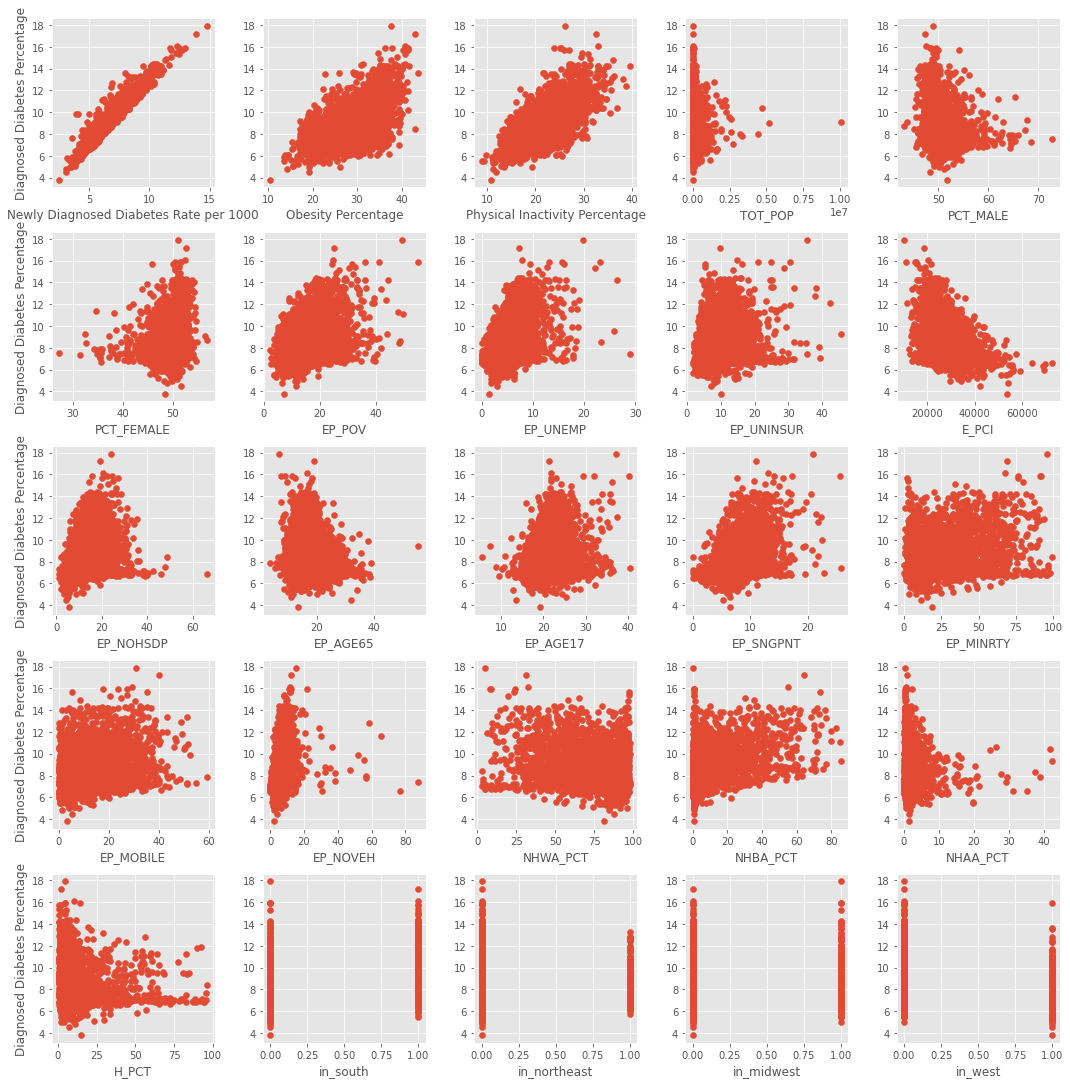

In [37]:
fig, ax = plt.subplots(5,5, figsize = (15,15))
for i,col in enumerate(fdf.columns[1:]):
    ax[i//5][i%5].scatter(fdf[col],fdf['Diagnosed Diabetes Percentage'])
    if i%5 == 0: 
        ax[i//5][i%5].set_ylabel('Diagnosed Diabetes Percentage')
    ax[i//5][i%5].set_xlabel(col)
fig.tight_layout()

In [38]:
from sklearn.decomposition import PCA

In [98]:
pc_df = fdf[fdf.columns[2:-4]]
norm_df = (pc_df - np.mean(pc_df))/np.std(pc_df)

pca = PCA(3).fit(norm_df.values)
reduced = norm_df.values @ pca.components_.T

Text(0, 0.5, 'Second Principal Component')

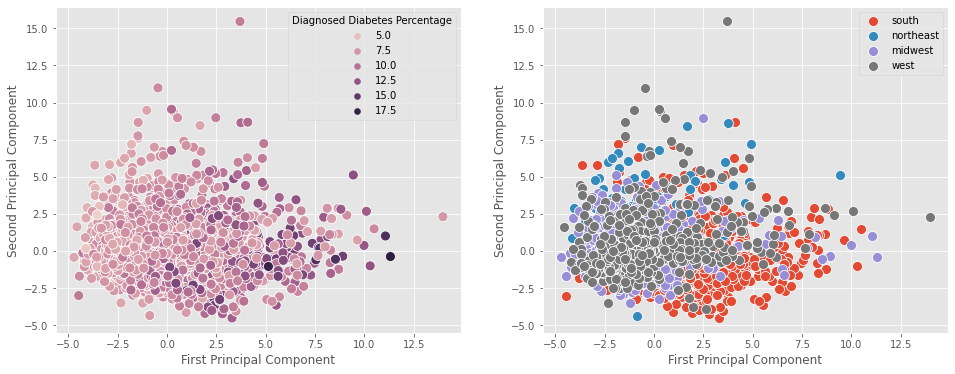

In [105]:
fig,ax = plt.subplots(1,2,figsize=(16,6))
sns.scatterplot(x=reduced[:,0],y=reduced[:,1],hue=fdf['Diagnosed Diabetes Percentage'],ax=ax[0],s=100)
ax[0].set_xlabel('First Principal Component')
ax[0].set_ylabel('Second Principal Component')

for col in ['in_south','in_northeast','in_midwest','in_west']:
    mask = fdf[col] == 1
    sns.scatterplot(x=reduced[mask,0],y=reduced[mask,1],label = col[3:],s=100)
ax[1].legend()

ax[1].set_xlabel('First Principal Component')
ax[1].set_ylabel('Second Principal Component')


In [100]:
pca.explained_variance_

array([5.68760618, 2.87856209, 2.60555619])

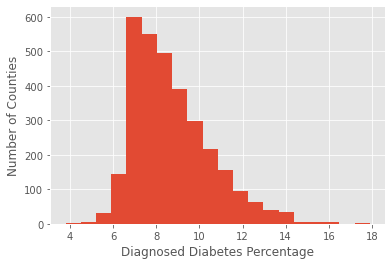

In [111]:
fig, ax = plt.subplots()
fdf['Diagnosed Diabetes Percentage'].hist(ax = ax,bins=20)
ax.set_xlabel('Diagnosed Diabetes Percentage')
ax.set_ylabel('Number of Counties')
#fig.savefig('figs/diabetes_hist.png')